<div dir="rtl">
<font size=5>
Improving Image Quality (Super-Resolution) with Custom CNN
</font>
</div>

<div dir="rtl">
<font size="4">
<li>✅ <strong>Data Preparation:</strong> Use a standard dataset (CIFAR-10) and create data pairs (poor image, high quality image) by downsampling the original images.</li>
<li>✅ <strong>Building a Super-Resolution Model:</strong> Design a custom CNN architecture that includes layers to increase the image dimensions such as <strong><code>Conv2DTranspose</code></strong> or <strong><code>UpSampling2D</code></strong>.</li>
<li>✅ <strong>Choosing an appropriate Loss Function:</strong> Use functions such as <code>Mean Squared Error (MSE)</code> or <code>Mean Absolute Error (MAE)</code> To compare the generated image pixel by pixel with the original image.</li>
<li>✅ <strong>Model training and validation:</strong> Train the model to minimize the difference between the reconstructed image and the real high-quality image.</li>
<li>✅ <strong>Result evaluation and visualization:</strong> Display a triplet of images (low-quality input, model output, and high-quality target) to visually evaluate the model's performance.</li>
</font>
</font>
</div>
<br>
<div dir="rtl">
<h2><strong>Dataset</strong></h2>
<li> We use the <strong>CIFAR-10</strong> dataset, which is available by default in Keras and does not require manual download.</li>
<li>This dataset contains <strong>60,000 color images</strong> with dimensions <code>32x32</code> pixels. We will use these images as high-resolution versions and produce the low-resolution versions ourselves.</li>
</font>
</div>

<br><br>
<div dir="rtl"> <font size="5">1. Load the required libraries</font> </div>
<br>

In [1]:
# TODO: Import the required libraries
import tensorflow as tf

<br><br>
<div dir="rtl"> <font size="5">2. Loading and Preparing the Dataset</font> </div>
<br>
<div dir="rtl">
<font size=4>
In this section, we load the CIFAR-10 dataset and prepare it for the Super-Resolution problem.
<br><br>
<strong>Steps:</strong>
<li>1. Load the CIFAR-10 dataset. We only need the images (x_train, x_test) and the labels (y_train, y_test) are not relevant in this exercise.</li>
<li>2. Normalize the pixel values ​​to the range <code>[0, 1]</code>. This will help in the stability of the model training.</li>
<li>3. Load the Cifar10 dataset into the project via Tensorflow.</li>
</font>
</div>

In [2]:
# TODO: Load the CIFAR-10 dataset.

import tensorflow as tf
from tensorflow.keras.datasets import cifar10
import numpy as np

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
# Check the shape of the original data
print('Shape of training data:', x_train.shape)
print('Shape of test data:', x_test.shape)

Shape of training data: (50000, 32, 32, 3)
Shape of test data: (10000, 32, 32, 3)


<br>
<div dir="rtl">
<font size=4>
Convert the pixel values ​​to float32 and normalize them to the range [0, 1].
</font>
</div>

In [4]:
# TODO: Convert pixel values ​​to float32 and normalize to the range [0, 1].

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

print('Pixel value after normalization - minimum:', x_train.min(), 'Maximum:', x_train.max())

Pixel value after normalization - minimum: 0.0 Maximum: 1.0


<br />
<div dir="rtl">
<font size="4">
In this section, the dimensions of the high-resolution (<strong>High Resolution - HR</strong
>) and low-resolution (<strong>Low Resolution - LR</strong>) images are specified.
The original images are <strong>32×32</strong>, but to simulate the low-resolution version, we reduce the same images to <strong>16×16</strong> dimensions.
This helps the model to learn
how to reconstruct clearer and more accurate versions from smaller, less detailed images.
</font>
</div>

In [8]:
# TODO: Define dimensions of high-quality (HR) and low-quality (LR) images


def create_hr_lr_pairs(images, lr_size=(16, 16)):
    """
    Create High-Resolution and Low-Resolution data pairs

    Parameters:
    - images: Original images with dimensions 32x32
    - lr_size: Dimensions of Low-Resolution images (default: 16x16)
    - hr_size: Dimensions of High-Resolution images (default: 32x32)
    """
    # Create Low-Resolution images by reducing dimensions
    lr_images = tf.image.resize(images, lr_size, method='bicubic')



    return lr_images, images # (model input, training target)


<br><br>
<div dir="rtl"> <font size="5">3. ​​Generating pairs of low-quality and high-quality data</font> </div>
<br>
<div dir="rtl">
<font size="4">
Our model needs to learn how to create a high-quality image (High Resolution (HR)) from a low-quality image (Low Resolution (LR)). To do this, we need to prepare the training data in the form of pairs (LR, HR).
<br><br>
<strong>Task:</strong>
<li>Using the <code>tf.image</code> function, reduce the high-quality images to half their size (e.g. from 32x32 to 16x16) to create low-quality (LR) versions of them.</li>
<li>These LR images will be used as input to the model and the HR images will be used as target output.</li>
</font>
</div><br>

In [28]:
x_train_lr, y_train_hr = create_hr_lr_pairs(x_train)
x_test_lr, y_test_hr = create_hr_lr_pairs(x_test)

print("High-Resolution image dimensions (model target)",y_train_hr.shape)
print("Low-Resolution image dimensions (model input)",x_train_lr.shape)

High-Resolution image dimensions (model target) (50000, 32, 32, 3)
Low-Resolution image dimensions (model input) (50000, 16, 16, 3)


<br><br>
<div dir="rtl"> <font size="5">4. Data visualization</font> </div>
<div dir="rtl">
<font size="4">
To better understand the data, display an example of low-quality images (the model input) and high-quality images (the desired output) side by side.
</font>
</div><br>

In [14]:
import matplotlib.pyplot as plt

In [20]:
# TODO: Write a function to display an LR and HR image side by side.
def visualize_hr_lr_comparison(lr_images, hr_images, num_samples=3):
    """Comparative display of low-resolution and high-resolution images"""
    
    fig, axes = plt.subplots(num_samples, 2, figsize=(10, 4*num_samples))
    
    for i in range(num_samples):
        idx = np.random.randint(0, len(lr_images))
        
        # تصویر Low-Resolution (16x16)
        axes[i, 0].imshow(lr_images[idx])
        axes[i, 0].set_title(f'Low-Resolution\nModel Input - Dimensions: {lr_images[idx].shape[:2]}')
        axes[i, 0].axis('off')
        
        # تصویر High-Resolution (32x32)
        axes[i, 1].imshow(hr_images[idx])
        axes[i, 1].set_title(f'High-Resolution\nModel Target - Dimensions: {hr_images[idx].shape[:2]}')
        axes[i, 1].axis('off')
    
    plt.tight_layout()
    plt.savefig("../plots/visualize-hr-lr-comparison.png")
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.008348653..0.98028487].


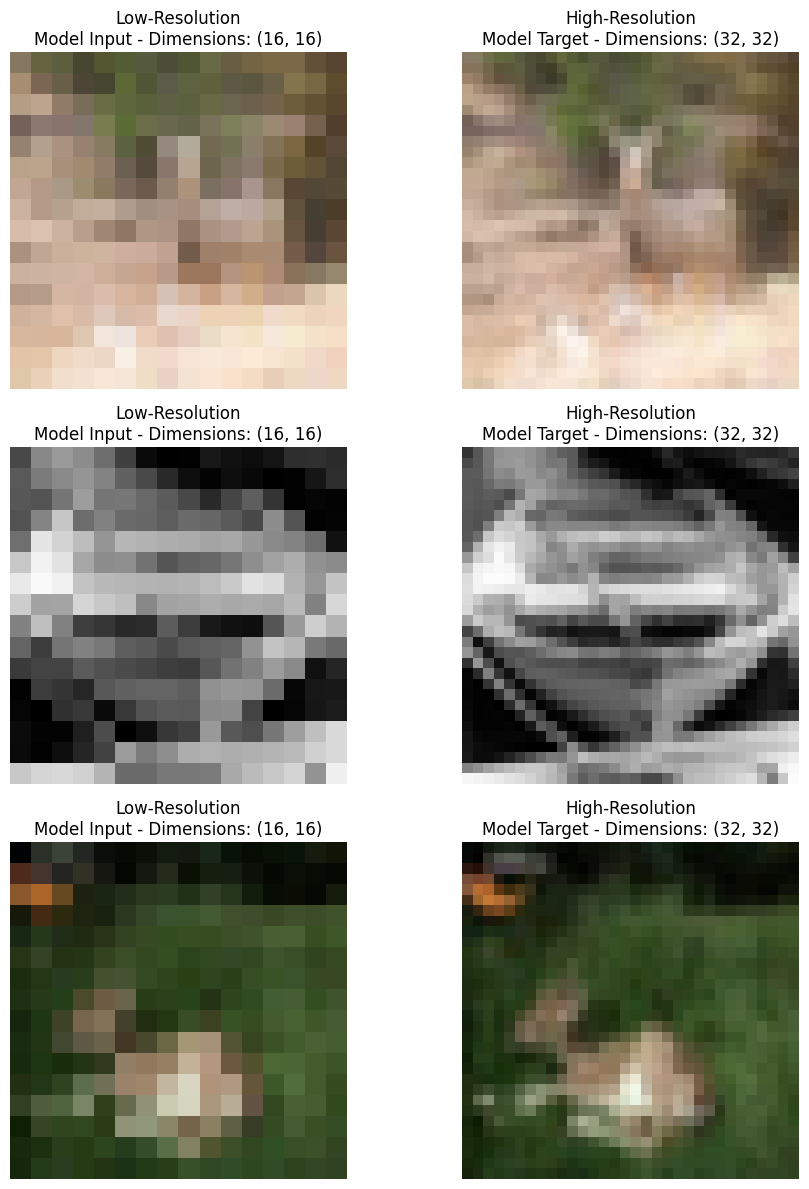

In [31]:
# TODO: Display a sample of the training data
visualize_hr_lr_comparison(x_train_lr, y_train_hr)

In [32]:
AUTOTUNE = tf.data.AUTOTUNE
BATCH_SIZE = 64

# دیتاست آموزش: ورودی LR و هدف HR
train_ds = tf.data.Dataset.from_tensor_slices((x_train_lr, y_train_hr))
train_ds = train_ds.cache() \
                   .shuffle(buffer_size=len(x_train_lr)) \
                   .batch(BATCH_SIZE) \
                   .prefetch(AUTOTUNE)

# دیتاست اعتبارسنجی: فقط LR و HR، بدون shuffle
val_ds = tf.data.Dataset.from_tensor_slices((x_test_lr, y_test_hr))
val_ds = val_ds.cache() \
               .batch(BATCH_SIZE) \
               .prefetch(AUTOTUNE)

<br /><br />

<div dir="rtl"><font size="5">5. Building the Super-Resolution Model Architecture</font></div>
<br />
<div dir="rtl">
<font size="4">
In this section, we design the CNN model architecture for the <strong>Super-Resolution</strong> task.
This model takes an <strong>LR</strong> image as input and produces a higher resolution (HR) image as output.
<br /><br />


<div dir="rtl"> <font size="4">To read about the UpSampling2D and Conv2DTranspose layers, refer to the links below.</font> </div>

* Basic Resouces:
  * [Conv2DTranspose | Tensorflow](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2DTranspose)
  * [UpSampling2D | Tensorflow](https://www.tensorflow.org/api_docs/python/tf/keras/layers/UpSampling2D)

* Advanced Resources:
  * [Deconvolution and Checkerboard Artifacts](https://distill.pub/2016/deconv-checkerboard/)
  * [Understanding Transposed Convolution](https://towardsdatascience.com/transposed-convolution-demystified-84ca81b4baba/)

  <br><br>

In [33]:
import tensorflow as tf
from tensorflow.keras import layers, models

In [ ]:
# TODO: Create Super Resolution function
def build_sr_model(lr_shape):

    inputs = layers.Input(shape=lr_shape)
    
    # --- Feature Extraction ---
    x = layers.Conv2D(64, 3, padding='same', activation='relu')(inputs)
    x = layers.Conv2D(64, 3, padding='same', activation='relu')(x)
    
    # --- Upsampling ---
    x = layers.UpSampling2D(size=(2, 2), interpolation='Bicubic')(x)
    x = layers.Conv2D(64, 3, padding='same', activation='relu')(x)

    # --- Refinement ---
    x = layers.Conv2D(64, 3, padding='same', activation='relu')(x)

    # --- Output Layer ---
    outputs = layers.Conv2D(3, 3, padding='same', activation='sigmoid')(x)

# Making the final model
    model = models.Model(inputs, outputs)

    return model


In [35]:
# TODO: Build the model
model = build_sr_model(lr_shape=((16, 16, 3)))

In [36]:
# TODO: Show model architecture summary
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 16, 16, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 16, 16, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 3)      │         1,731 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 114,307 (446.51 KB)

 Trainable params: 114,307 (446.51 KB)

 Non-trainable params: 0 (0.00 B)

<br><br>
<div dir="rtl"> <font size="5">6. Model Training</font> </div>
<div dir="rtl">
<font size="4">
Now we train the model using the prepared data. Use callbacks if needed.
<br><br>
<strong>Important Note:</strong>
<li>The model input (x) is low-quality images.</li>
<li>The target output (y) is high-quality images.</li>
<li>The model learns to minimize the cost function between the predicted output and the actual output.</li>
</font>
</div>

In [ ]:
# TODO: Implement Callbacks functions if needed.

In [ ]:
# TODO: Train the model.
# Use the training data to train the model and the test data for validation.

<br><br>
<div dir="rtl"> <font size="5">7. Plotting the Cost Function (Loss)</font> </div>
<div dir="rtl">
<font size="4">
Plot the cost function for the training and validation data to examine the learning process of the model.
</font>
</div>

In [ ]:
# TODO: Plot the Loss plot for the training and validation data.
def plot_loss_history(history):
    """
    Plots the Loss plot for the training and validation data.

    Args:
    history: The History object returned by the model.fit method.
    """
    pass

<br /><br />
<div dir="rtl"><font size="5">8. Final Evaluation and Visualization of Results</font></div>
<br />
<div dir="rtl">
<font size="4">
In this section, you visually evaluate the performance of the Super-Resolution model.
The goal is to see how well the model has reproduced details.
<br /><br />
<strong>Your task:</strong>
<li>
Use the trained model to make predictions on a few random samples of the test data.
</li>
<li>
Then, for each sample, display three images side by side:
<li>
Low-Resolution (LR) input image: The image that the model received as input.
</li>
<li>
Super-Res (Predicted) image: The image that your model predicted with high quality.
</li>
<li>
Ground Truth HR: The original image that the model was supposed to reconstruct (the target of the model).
</li>
</li>
By comparing these three images, you can evaluate the visual quality of the model's reconstruction and its ability to add detail.
</font>
</div>

In [ ]:
# TODO: Predict high-quality images from low-quality test images using the trained model.

In [ ]:
# TODO: Write a function to display a triplet of images.

<br /><br />
<div dir="rtl">
<font size="4">
<div dir="rtl">
<font size="5">9. Quantitative Evaluation Using PSNR </font> </div>
</font>
<font size="4">
<strong>Peak Signal-to-Noise Ratio (PSNR)</strong> is an engineering metric for measuring the quality of image reconstruction that measures how close the reconstructed image (e.g., the output of a Super-Resolution model) is to the original image. This metric is defined based on the
mean square error (MSE) and its unit is decibels (dB). The higher the
PSNR value, the less noise and the better the reconstruction quality. <br /><br />
Typically, a PSNR value higher than 30 dB indicates good quality in
natural image reconstruction, while lower values ​​indicate the presence of noise or loss of detail in the image.
<br /><br />
Since the architecture designed in this exercise is a simple and educational model, there is no expectation of a high PSNR value. The main goal is to get acquainted with the basic concepts of the <strong>Super-Resolution</strong> task and how to evaluate it.
<br><br>
<font color='red'>Objective:</font> Try to achieve a PSNR score between 20 and 30.
<br>
<br>For more information on this score, see the following links.
</font>
</div>

* [Peak Signal-to-Noise Ratio](https://en.wikipedia.org/wiki/Peak_signal-to-noise_ratio)
* [Tensorflow | PSNR](https://www.tensorflow.org/api_docs/python/tf/image/psnr)
<br>

In [ ]:
# TODO: Calculate PSNR for the entire test set
# Use the psnr function from TensorFlow to calculate the Peak Signal-to-Noise Ratio (PSNR)